In [25]:
# origin kernel https://www.kaggle.com/mahmoudreda55/brain-tumor-85

import numpy as np 
import pandas as pd
import os

import kerastuner as kt
# from tensorflow import keras as keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.preprocessing import image
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16

In [4]:

for dirname, _, filenames in os.walk('input/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/archive\brain_tumor_dataset\no\1 no.jpeg
input/archive\brain_tumor_dataset\no\10 no.jpg
input/archive\brain_tumor_dataset\no\11 no.jpg
input/archive\brain_tumor_dataset\no\12 no.jpg
input/archive\brain_tumor_dataset\no\13 no.jpg
input/archive\brain_tumor_dataset\no\14 no.jpg
input/archive\brain_tumor_dataset\no\15 no.jpg
input/archive\brain_tumor_dataset\no\17 no.jpg
input/archive\brain_tumor_dataset\no\18 no.jpg
input/archive\brain_tumor_dataset\no\19 no.jpg
input/archive\brain_tumor_dataset\no\2 no.jpeg
input/archive\brain_tumor_dataset\no\20 no.jpg
input/archive\brain_tumor_dataset\no\21 no.jpg
input/archive\brain_tumor_dataset\no\22 no.jpg
input/archive\brain_tumor_dataset\no\23 no.jpg
input/archive\brain_tumor_dataset\no\24 no.jpg
input/archive\brain_tumor_dataset\no\25 no.jpg
input/archive\brain_tumor_dataset\no\26 no.jpg
input/archive\brain_tumor_dataset\no\27 no.jpg
input/archive\brain_tumor_dataset\no\28 no.jpg
input/archive\brain_tumor_dataset\no\29 no.jpg
input/archive

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory('input/Brain Tumor Images Dataset/training_set',
                                                 target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory("input/Brain Tumor Images Dataset/test_set",
                                                           batch_size=32,
                                                           target_size=(64,64),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)

val_datagen = ImageDataGenerator(rescale = 1/255)
val_data =  val_datagen.flow_from_directory("input/Brain Tumor Images Dataset/validation_set",
                                            batch_size=32,
                                            target_size=(64,64),
                                            class_mode='sparse',
                                            shuffle=True,seed=1)

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [17]:
classes = {0:"hemmorhage_data",1:"non_hemmorhage_data"}
for i in classes.items():
    print(i)

(0, 'hemmorhage_data')
(1, 'non_hemmorhage_data')


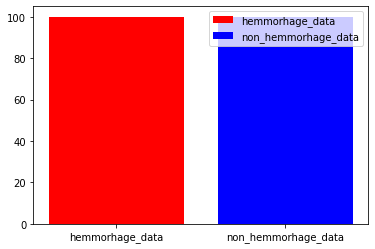

In [18]:
fig, ax = plt.subplots()
ax.bar("hemmorhage_data",100,label="hemmorhage_data",color="r")
ax.bar("non_hemmorhage_data",100,label="non_hemmorhage_data",color="b")
ax.legend()

In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [20]:
#compile model
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


#early stop 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [21]:
for i in range(4):
 history=model.fit(train_data,
    validation_data = val_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
5/5 [==============================] - 2s 378ms/step - loss: 0.6868 - accuracy: 0.5357 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 1s 284ms/step - loss: 0.6421 - accuracy: 0.6500 - val_loss: 0.6519 - val_accuracy: 0.5750
Epoch 3/50
5/5 [==============================] - 2s 340ms/step - loss: 0.6104 - accuracy: 0.6357 - val_loss: 0.7041 - val_accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 1s 262ms/step - loss: 0.5126 - accuracy: 0.7571 - val_loss: 0.6148 - val_accuracy: 0.5750
Epoch 5/50
5/5 [==============================] - 1s 243ms/step - loss: 0.5179 - accuracy: 0.7357 - val_loss: 0.6740 - val_accuracy: 0.6250
Epoch 6/50
5/5 [==============================] - 2s 307ms/step - loss: 0.4007 - accuracy: 0.8286 - val_loss: 0.6453 - val_accuracy: 0.6250
Epoch 7/50
5/5 [==============================] - 1s 263ms/step - loss: 0.4724 - accuracy: 0.8143 - val_loss: 0.6800 - val_accuracy: 0.7000
Epoch 8/50
5/5 [====

In [22]:
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

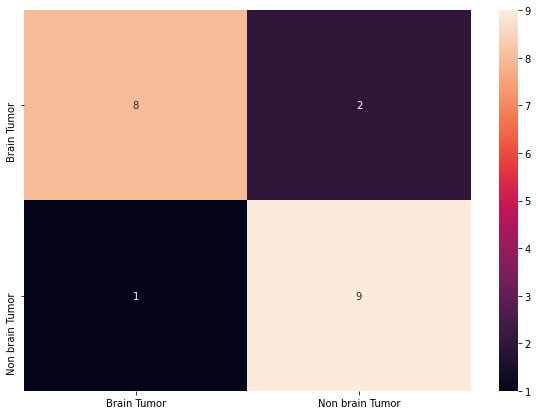

In [23]:
import seaborn as sn
array  = [[8,2],[1,9]]
l = ["Brain Tumor","Non brain Tumor"]
df_cm = pd.DataFrame(array, index = [i for i in  l],
                  columns = [i for i in l])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

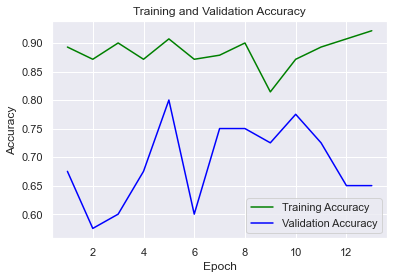

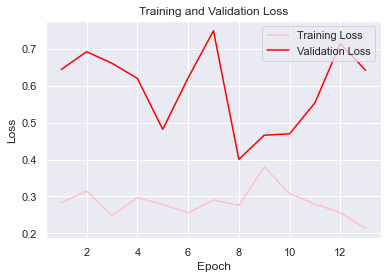

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

[1]
non_hemmorhage_data


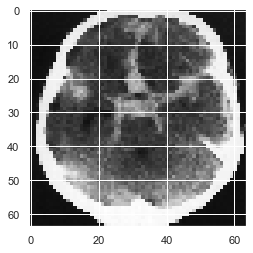

In [37]:
img_path = "input/Brain Tumor Images Dataset/validation_set/hemmorhage_data/019.png"
test_img = image.load_img(img_path, target_size=(64, 64))

img_as_array = image.img_to_array(test_img)
img_as_array = np.expand_dims(img_as_array, axis=0)

prediction = model.predict(img_as_array)
prediction = np.argmax(prediction, axis=1)

print(prediction)
print(classes[prediction[0]])
plt.imshow(test_img)